In [1]:
import pandas as pd
import numpy as np

In [2]:
coso = pd.read_csv('data/coso.csv')
new0 = pd.read_csv('data/New_DB_new0.csv')
new0 = new0[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()
coso = coso[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()

data_0 = pd.read_csv('data/xterrae_data_0').dropna()
data_1 = pd.read_csv('data/xterrae_data_1').dropna()

data_0 = pd.merge(new0, data_0, on=['Latitud', 'Longitud'], how='inner')
data_1 = pd.merge(coso, data_1, on=['Latitud', 'Longitud'], how='inner')

data_0 = data_0.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_1 = data_1.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_0['Valor'] = 0
data_1['Valor'] = 1

final_db = pd.read_csv('data/final_db.csv')
final_db = final_db.drop(columns='Unnamed: 0')

In [3]:
inicial_db = pd.read_csv('data/db_inicial.csv')
inicial_db.shape, final_db.shape

((1070, 151), (733, 137))

In [4]:
#importe de funciones locales
from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral

#Analizar si todas las columnas estan para luego concatenar
comparar_columnas(final_db, data_0)
comparar_columnas(final_db, data_1)

Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.
Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.


In [5]:
# Concatenación y eliminación de valores NaN
final = pd.concat([final_db, data_0])
final = pd.concat([final, data_1])
final = final.dropna()

# Separación de los valores
final_x = final.drop(columns='Valor')
final_y = final.Valor


In [6]:
final

PIRange_Bulkd.0-5cm.tif  PIRange_Bulkd.100-200cm.tif  \
0                       0.609                        0.689   
1                       0.609                        0.689   
2                       0.595                        0.753   
3                       0.589                        0.682   
4                       0.659                        0.689   
...                       ...                          ...   
1317                    0.604                        0.687   
1318                    0.587                        0.701   
1319                    0.587                        0.701   
1320                    0.587                        0.701   
1321                    0.587                        0.701   

      PIRange_Bulkd.15-30cm.tif  PIRange_Bulkd.30-60cm.tif  \
0                         0.483                      0.641   
1                         0.483                      0.641   
2                         0.484                      0.621   
3                         0.482                      0.614   
4                         0.573                      0.675   
...                         ...                        ...   
1317                      0.502                      0.631   
1318                      0.478                      0.612   
1319                      0.478                      0.612   
1320                      0.478                      0.612   
1321                      0.478                      0.612   

      PIRange_Bulkd.5-15cm.tif  PIRange_Bulkd.60-100cm.tif  \
0                        0.550                       0.650   
1                        0.550                       0.650   
2                        0.497                       0.706   
3                        0.498                       0.656   
4                        0.553                       0.660   
...                        ...                         ...   
1317                     0.512                       0.663   
1318                     0.556                       0.676   
1319                     0.556                       0.676   
1320                     0.556                       0.676   
1321                     0.556                       0.676   

      PIRange_Clay.0-5cm.tif  PIRange_Clay.100-200cm.tif  \
0                  22.358000                   32.235001   
1                  22.358000                   32.235001   
2                  23.513000                   32.325001   
3                  25.056000                   45.129002   
4                  21.844999                   30.417000   
...                      ...                         ...   
1317               25.153999                   44.474998   
1318               25.213001                   43.882000   
1319               25.213001                   43.882000   
1320               25.213001                   43.882000   
1321               25.213001                   43.882000   

      PIRange_Clay.15-30cm.tif  PIRange_Clay.30-60cm.tif  ...  \
0                    22.490000                 26.009001  ...   
1                    22.490000                 26.009001  ...   
2                    25.268002                 31.559998  ...   
3                    25.813000                 32.742996  ...   
4                    18.743000                 21.934999  ...   
...                        ...                       ...  ...   
1317                 24.527000                 31.266998  ...   
1318                 24.993999                 31.622002  ...   
1319                 24.993999                 31.622002  ...   
1320                 24.993999                 31.622002  ...   
1321                 24.993999                 31.622002  ...   

      Tex_Class.0-5cm.tif  Tex_Class.100-200cm.tif  Tex_Class.15-30cm.tif  \
0                     8.0                      8.0                    8.0   
1                     8.0                      8.0                    8.0   
2                     8.0             

In [7]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [8]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.9)
final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 46)


In [9]:
"""import seaborn as sns
import matplotlib.pyplot as plt
corr = final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))

heatmap = sns.heatmap(corr, mask=mask, cmap='pink_r', vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

title = heatmap.set_title("Correlation Heatmap", weight='bold', size=16)
title.set_position([0.45, 1.1])
plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\ncorr = final.corr()\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\nfig, ax = plt.subplots(figsize=(15, 12))\n\nheatmap = sns.heatmap(corr, mask=mask, cmap=\'pink_r\', vmax=.3, center=0,\n            annot=True, fmt=\'.2f\', square=True, linewidths=.5, cbar_kws={"shrink": .5})\n\nplt.xticks(rotation=45, ha=\'right\')\nplt.yticks(rotation=0)\n\ntitle = heatmap.set_title("Correlation Heatmap", weight=\'bold\', size=16)\ntitle.set_position([0.45, 1.1])\nplt.show()'

In [10]:
# Importaciones de funciones para generar los modelos
# Importaciones de selección de características
from feature_selection import cart_feature_selection, seleccion_caracteristicas_genetico
from models_gen_X_y import xgboost_random_search, xgboost_bayesopt_classifier, mlp_binary_classification, svm_with_hyperparameter_tuning

In [11]:
# Selección de características por cart y luego se establecen los dataframe con las características elegidas
cart_features = cart_feature_selection(final, 'Valor', n_features=30)
X = final[cart_features]
y = final['Valor']
print(f'Caracateristicas seleccionadas por cart: {cart_features}')

Caracateristicas seleccionadas por cart: ['slope', 'valor_humedad_suelo1', 'PP', 'PIRange_Clay.15-30cm.tif', 'ksat_60-100cm.tif', 'n_60-100cm.tif', 'n_15-30cm.tif', 'n_5-15cm.tif', 'PIRange_Clay.0-5cm.tif', 'alpha.0-5cm.tif', 'PIRange_Clay.5-15cm.tif', 'PIRange_Bulkd.100-200cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.15-30cm.tif', 'Bulkd.5-15cm.tif', 'ksat_100-200cm.tif', 'PIRange_Sand.100-200cm.tif', 'ksat_15-30cm.tif', 'Bulkd.100-200cm.tif', 'ksat_5-15cm.tif', 'FC.5-15cm.tif', 'theta_s_15-30cm.tif', 'FC.100-200cm.tif', 'theta_s_5-15cm.tif', 'ksat_0-5cm.tif', 'AvMoist.100-200cm.tif', 'PIRange_Bulkd.0-5cm.tif', 'AvMoist.0-5cm.tif', 'n_100-200cm.tif']


In [12]:
features = ['PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif', 'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif', 'valor_humedad_suelo1', 'slope', 'PP']
X = final[features]
y = final['Valor']

In [50]:
#ga_features = ['PIRange_Clay.30-60cm.tif', 'PIRange_Sand.15-30cm.tif', 'n_60-100cm.tif', 'theta_r_60-100cm.tif', 'Bulkd.15-30cm.tif', 'Silt.0-5cm.tif', 'Tex_Class.100-200cm.tif', 'Tex_Class.15-30cm.tif', 'PP', 'slope'] 0.99
#['PIRange_Bulkd.30-60cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'PIRange_Clay.0-5cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.5-15cm.tif', 'AWC_60-100cm.tif', 'FC.60-100cm.tif', 'ksat_15-30cm.tif', 'ksat_30-60cm.tif', 'ksat_5-15cm.tif', 'PWP.15-30cm.tif', 'PWP.30-60cm.tif', 'theta_r_0-5cm.tif', 'alpha.0-5cm.tif', 'alpha.5-15cm.tif', 'ksat.30-60cm.tif', 'ksat.60-100cm.tif', 'n.60-100cm.tif', 'theta_r.30-60cm.tif', 'theta_s.15-30cm.tif', 'Bulkd.15-30cm.tif', 'Bulkd.5-15cm.tif', 'Clay.30-60cm.tif', 'Clay.5-15cm.tif'] 0.99
#X = final[ga_features]
#y = final['Valor']

Número de muestras de entrenamiento: 2518, Número de muestras de prueba: 630
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 88.57%


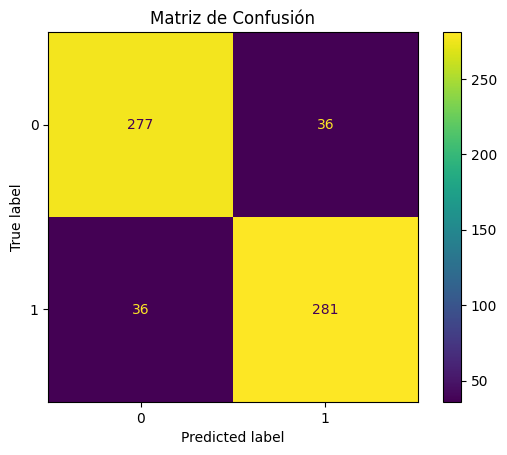

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.1, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8857142857142857,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 0,
  'reg_alpha': 0,
  'n_estimators': 100,
  'max_depth': 10,
  'learning_rate': 0.2,
  'gamma': 0.1,
  'colsample_bytree': 0.6}}

In [13]:
# Estancia para modelo de xgboost_random_search

# Se define los parámetros a buscar para el ajuste del modelo
param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 1.0, 10.0]
        }
xgboost_random_search(X, y, param_grid=param_grid)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda

Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.508293914463928, 'xgb__gamma': 0.2560465291496405, 'xgb__learning_rate': 0.23423081744595858, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1.4136772353684972, 'xgb__n_estimators': 588, 'xgb__subsample': 0.845468869051233}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       306
           1       0.82      0.87      0.84       324

    accuracy                           0.83       630
   macro avg       0.84      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630


Matriz de confusión:
[[242  64]
 [ 41 283]]


/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


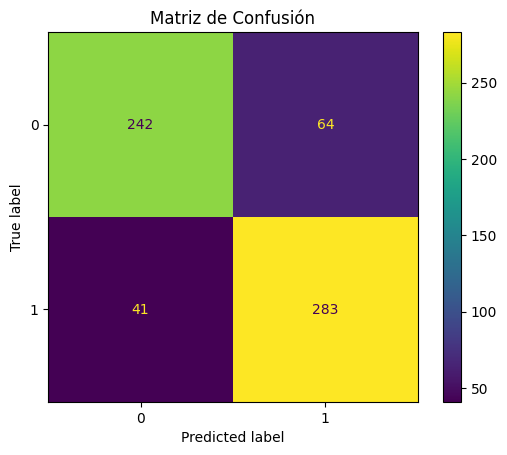

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x733f89d4fca0>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x733f7c0e4190>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x733f7c179c10>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x733f7c0e42e0>},
                   random_state=42, verbose=1)

In [14]:
xgboost_bayesopt_classifier(X,y)

In [15]:
# Se obtuvieron los valores de lo modelos con los datos raw
# ahora se realiza la depuración mediante PUBagging para reentrenar los model
# y comparar los resultados de los modelos sin/con PUBagging

from pubagging import PUBagging

data = final[features]
data['Valor'] = final.Valor
data_aux_1 = data[data.Valor == 1]
data_aux_0 = data[data.Valor == 0]
data_aux_0 = data_aux_0.drop(columns='Valor')
data_aux_1 = data_aux_1.drop(columns='Valor')

landslide_samples = data_aux_1# Example landslide samples as DataFrame
unlabeled_samples = data_aux_0# Example unlabeled samples as DataFrame

pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.4, random_state=42)

pu_bagging.fit(landslide_samples, unlabeled_samples)

probabilities = pu_bagging.predict_proba(unlabeled_samples)
print("Predicted probabilities:", probabilities)

threshold = 0.5 

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)

# Se crean los nuevos dataframe para el reentreno donde tenemos data y data_y como input y output respectivamente
selected_non_landslide_samples['Valor'] = 0
data_aux_1['Valor'] = 1

data = pd.concat([data_aux_1, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

/tmp/ipykernel_292878/812532220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Valor'] = final.Valor


Predicted probabilities: [0.4 0.4 0.2 ... 0.2 0.  0.6]
Muestras no deslizamiento seleccionadas:
      PIRange_Bulkd.100-200cm.tif  PIRange_Sand.0-5cm.tif  \
0                           0.689               36.184998   
1                           0.689               36.184998   
2                           0.753               36.636002   
3                           0.682               34.499001   
4                           0.689               36.883003   
...                           ...                     ...   
1163                        0.687               36.174000   
1164                        0.684               36.351997   
1165                        0.690               39.068001   
1166                        0.691               37.070000   
1167                        0.702               38.124001   

      PIRange_Sand.100-200cm.tif  PIRange_Sand.15-30cm.tif  alpha_15-30cm.tif  \
0                      43.908001                 30.825001              0.011   
1        

/tmp/ipykernel_292878/812532220.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_non_landslide_samples['Valor'] = 0


Número de muestras de entrenamiento: 2376, Número de muestras de prueba: 594
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 85.52%


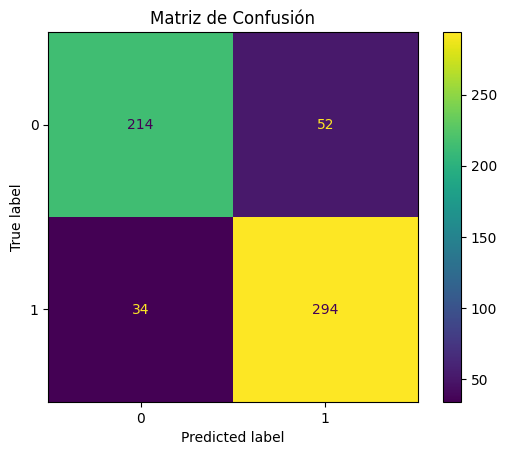

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.1, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.2, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8552188552188552,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 0,
  'reg_alpha': 0,
  'n_estimators': 100,
  'max_depth': 10,
  'learning_rate': 0.2,
  'gamma': 0.1,
  'colsample_bytree': 0.6}}

In [16]:
# Se realiza el reentranmiento de los modelos con los datos ahora depurados
xgboost_random_search(data, data_y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       270
           1       0.78      0.80      0.79       324

    accuracy                           0.77       594
   macro avg       0.76      0.76      0.76       594
weighted avg       0.77      0.77      0.77       594

Matriz de confusión
[[197  73]
 [ 66 258]]


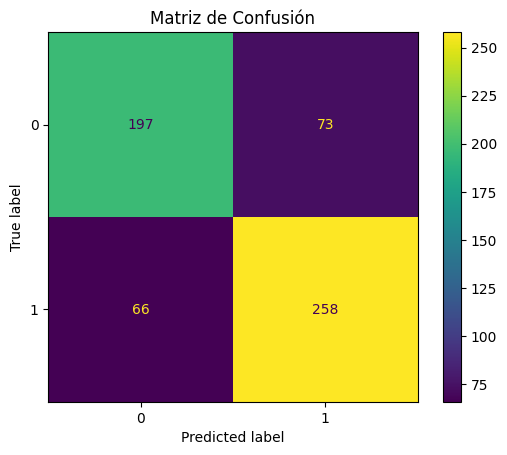

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [17]:
mlp_binary_classification(data,data_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/manuel-labbe/miniconda

Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.508293914463928, 'xgb__gamma': 0.2560465291496405, 'xgb__learning_rate': 0.23423081744595858, 'xgb__max_depth': 10, 'xgb__min_child_weight': 1.4136772353684972, 'xgb__n_estimators': 588, 'xgb__subsample': 0.845468869051233}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       270
           1       0.87      0.88      0.87       324

    accuracy                           0.86       594
   macro avg       0.86      0.86      0.86       594
weighted avg       0.86      0.86      0.86       594


Matriz de confusión:
[[226  44]
 [ 39 285]]


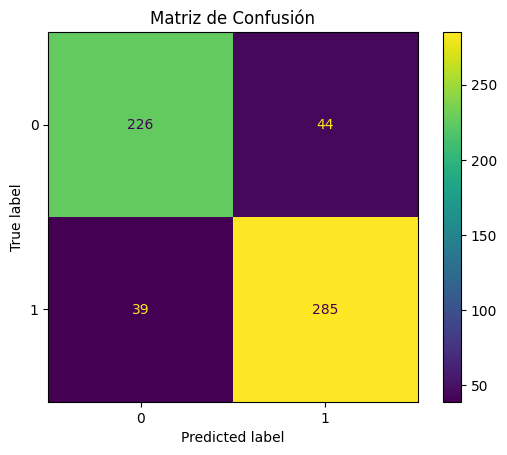

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x733fc0900bb0>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x733fc09d0f40>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x733fc09e79d0>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x733f7c07eb80>},
                   random_state=42, verbose=1)

In [18]:
xgboost_bayesopt_classifier(data,data_y)

In [19]:
svm_with_hyperparameter_tuning(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados:
{'svm__C': 15.699452033620265, 'svm__gamma': 0.05908361216819946, 'svm__kernel': 'rbf'}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       313
           1       0.79      0.80      0.79       317

    accuracy                           0.79       630
   macro avg       0.79      0.79      0.79       630
weighted avg       0.79      0.79      0.79       630


Matriz de confusión:
[[244  69]
 [ 64 253]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=15.699452033620265, gamma=0.05908361216819946,
                     random_state=42))])

In [20]:
svm_with_hyperparameter_tuning(data,data_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados:
{'svm__C': 15.699452033620265, 'svm__gamma': 0.05908361216819946, 'svm__kernel': 'rbf'}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       266
           1       0.79      0.83      0.81       328

    accuracy                           0.78       594
   macro avg       0.78      0.78      0.78       594
weighted avg       0.78      0.78      0.78       594


Matriz de confusión:
[[193  73]
 [ 57 271]]


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=15.699452033620265, gamma=0.05908361216819946,
                     random_state=42))])

In [59]:
#target_column = 'Valor'
#mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column)
#print("Mejores características seleccionadas:", mejores_caracteristicas)
#print("Mejor fitness:", hof[0].fitness.values[0])

Learning rate set to 0.014908
0:	learn: 0.6901018	total: 50.2ms	remaining: 50.2s
1:	learn: 0.6866008	total: 52ms	remaining: 26s
2:	learn: 0.6838474	total: 54.1ms	remaining: 18s
3:	learn: 0.6810617	total: 56ms	remaining: 13.9s
4:	learn: 0.6781917	total: 57.6ms	remaining: 11.5s
5:	learn: 0.6753121	total: 59.4ms	remaining: 9.84s
6:	learn: 0.6719849	total: 61.3ms	remaining: 8.69s
7:	learn: 0.6696184	total: 63ms	remaining: 7.81s
8:	learn: 0.6669632	total: 64.8ms	remaining: 7.13s
9:	learn: 0.6645563	total: 66.6ms	remaining: 6.59s
10:	learn: 0.6613952	total: 68.5ms	remaining: 6.16s
11:	learn: 0.6590349	total: 70.5ms	remaining: 5.8s
12:	learn: 0.6562784	total: 72.2ms	remaining: 5.48s
13:	learn: 0.6531324	total: 74.2ms	remaining: 5.22s
14:	learn: 0.6508020	total: 76ms	remaining: 4.99s
15:	learn: 0.6471805	total: 77.9ms	remaining: 4.79s
16:	learn: 0.6450232	total: 80ms	remaining: 4.63s
17:	learn: 0.6432041	total: 82ms	remaining: 4.47s
18:	learn: 0.6403007	total: 83.7ms	remaining: 4.32s
19:	learn

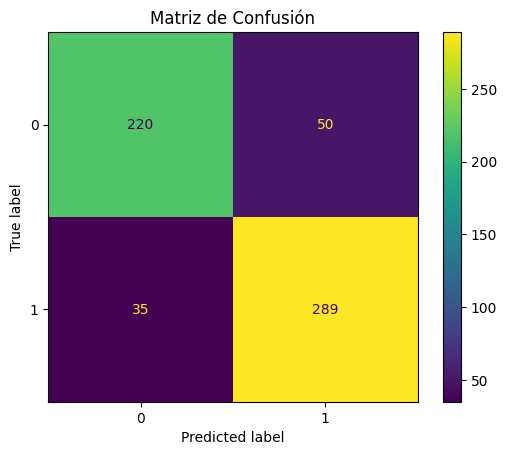

In [21]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from models_gen_X_y import plot_confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)

model = CatBoostClassifier()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
predictions = model.predict(X_test)
print(predictions)
plot_confusion_matrix(model, X_test, y_test)

In [22]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       270
           1       0.85      0.89      0.87       324

    accuracy                           0.86       594
   macro avg       0.86      0.85      0.85       594
weighted avg       0.86      0.86      0.86       594



In [23]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier()
random_search_cb = RandomizedSearchCV(estimator=CB, param_distributions=catboost_param_dist,
                                      cv = 5, verbose = 2, random_state=42)
random_search_cb.fit(X_train, y_train)
predictions = random_search_cb.predict(X_test)
print(classification_report(y_pred= predictions, y_true = y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6847677	total: 1.25ms	remaining: 100ms
1:	learn: 0.6769319	total: 2.06ms	remaining: 81.2ms
2:	learn: 0.6706148	total: 2.88ms	remaining: 75ms
3:	learn: 0.6636467	total: 3.85ms	remaining: 74.1ms
4:	learn: 0.6572967	total: 4.82ms	remaining: 73.3ms
5:	learn: 0.6492795	total: 5.86ms	remaining: 73.3ms
6:	learn: 0.6429975	total: 6.88ms	remaining: 72.8ms
7:	learn: 0.6370505	total: 8.04ms	remaining: 73.4ms
8:	learn: 0.6309347	total: 9.1ms	remaining: 72.8ms
9:	learn: 0.6255221	total: 10.2ms	remaining: 72.5ms
10:	learn: 0.6205181	total: 11.3ms	remaining: 71.7ms
11:	learn: 0.6151002	total: 13.9ms	remaining: 79.9ms
12:	learn: 0.6105415	total: 15.3ms	remaining: 80.2ms
13:	learn: 0.6054231	total: 16.9ms	remaining: 80.7ms
14:	learn: 0.6005246	total: 18.1ms	remaining: 79.4ms
15:	learn: 0.5963291	total: 19.7ms	remaining: 80.1ms
16:	learn: 0.5924832	total: 20.9ms	remaining: 78.6ms
17:	learn: 0.5881310	total: 22ms	remaining: 77.1ms
1

In [24]:
params = random_search_cb.get_params

In [25]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.utils import shuffle

X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(CatBoostClassifier(**params), X, y  , scoring='recall',cv=5)

TypeError: type object argument after ** must be a mapping, not method

In [26]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#scores = ['precision', 'recall']
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid_search = GridSearchCV(
    SVC(), param_grid, verbose=3
)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.668 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.644 total time=   1.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.594 total time=   1.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.644 total time=   1.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.634 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

KeyboardInterrupt: 

0.7629382303839732


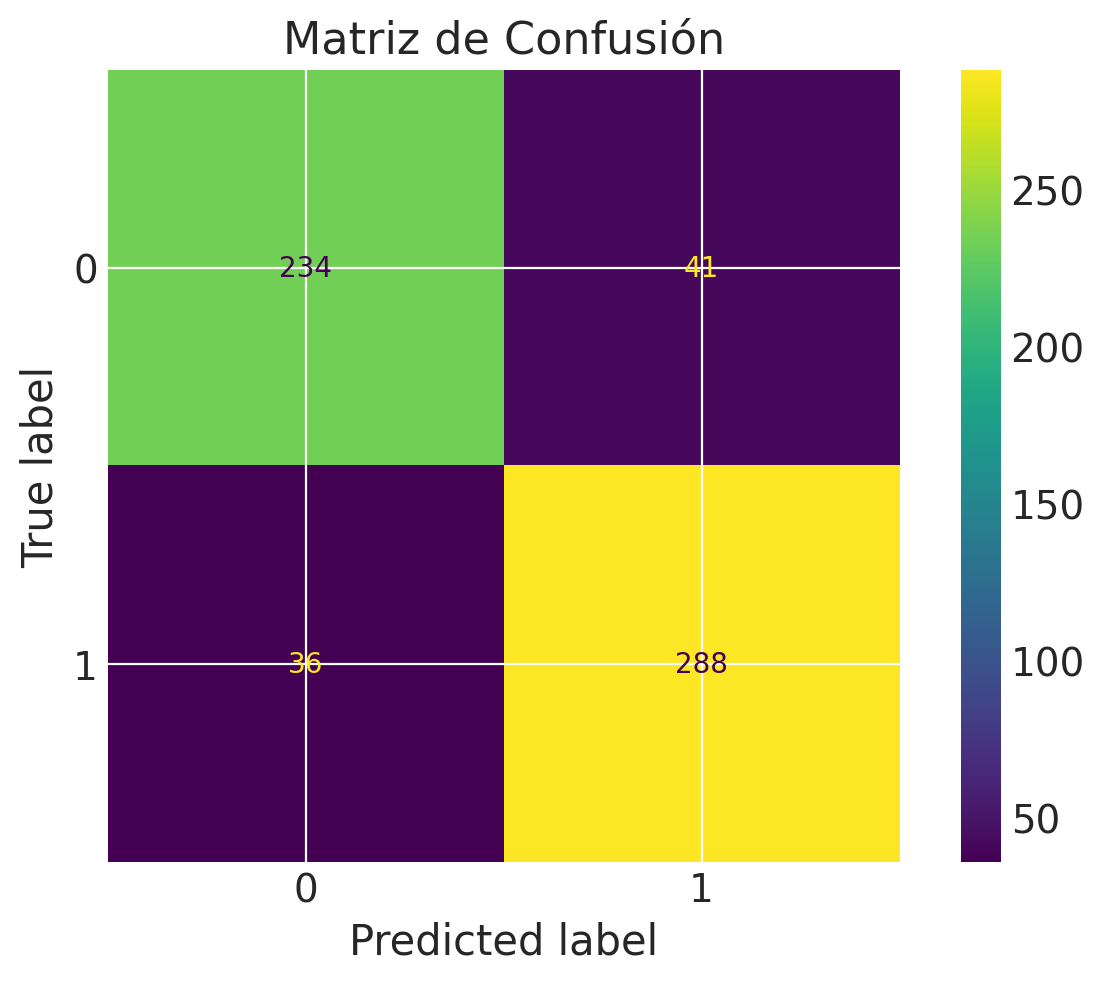

In [71]:
acc = grid_search.best_estimator_.score(X_test, y_test)
predictions = grid_search.best_estimator_.predict(X_test)
print(acc)
plot_confusion_matrix(model, X_test, y_test)

Learning rate set to 0.005571
0:	learn: 0.6912173	total: 1.17ms	remaining: 1.17s
1:	learn: 0.6896377	total: 2.3ms	remaining: 1.15s
2:	learn: 0.6883211	total: 3.34ms	remaining: 1.11s
3:	learn: 0.6860367	total: 4.45ms	remaining: 1.11s
4:	learn: 0.6834454	total: 5.58ms	remaining: 1.11s
5:	learn: 0.6822421	total: 6.67ms	remaining: 1.1s
6:	learn: 0.6800265	total: 7.72ms	remaining: 1.09s
7:	learn: 0.6784352	total: 8.76ms	remaining: 1.09s
8:	learn: 0.6767011	total: 9.79ms	remaining: 1.08s
9:	learn: 0.6749214	total: 10.9ms	remaining: 1.08s
10:	learn: 0.6729339	total: 12.1ms	remaining: 1.09s
11:	learn: 0.6710522	total: 13.5ms	remaining: 1.11s
12:	learn: 0.6687207	total: 14.6ms	remaining: 1.11s
13:	learn: 0.6672852	total: 17.2ms	remaining: 1.21s
14:	learn: 0.6650429	total: 18.4ms	remaining: 1.21s
15:	learn: 0.6629278	total: 19.8ms	remaining: 1.22s
16:	learn: 0.6606487	total: 21.1ms	remaining: 1.22s
17:	learn: 0.6590794	total: 22.4ms	remaining: 1.22s
18:	learn: 0.6568743	total: 23.6ms	remaining: 

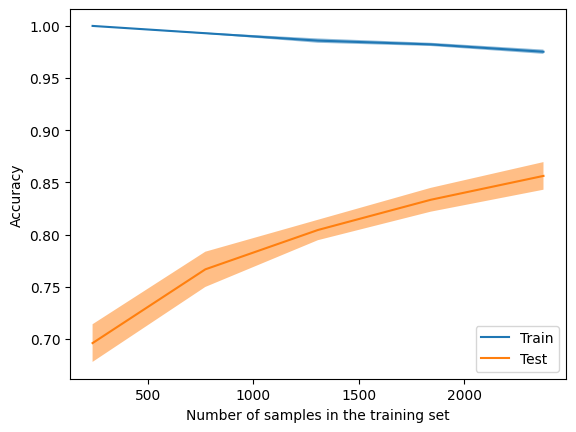

In [31]:
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(CatBoostClassifier(iterations=1000), X,y,scoring='accuracy', cv=5)

In [ ]:
# Guardar plk 85%+ modelos
# countplot
# gráficos de conf, roc curve, model selection
# proceso de plks en scripts


# MODELOS
# SVM
# xgboost randon search + bayes opt
# catboost
# mlp

In [32]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [33]:
%config InlineBackend.figure_format = 'retina'
floatX = pytensor.config.floatX
RANDOM_SEED = 9927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [34]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
    init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
    init_out = rng.standard_normal(size=n_hidden).astype(floatX)

    coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        "obs_id": np.arange(X_train.shape[0]),
    }
    with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", y_train, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )
    return neural_network

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)
neural_network = construct_nn(X_train, y_train)

/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [35]:
%%time
with neural_network:
    approx = pm.fit(n=30_000)

Finished [100%]: Average Loss = 1,664


CPU times: user 40.9 s, sys: 2min 58s, total: 3min 39s
Wall time: 54.6 s


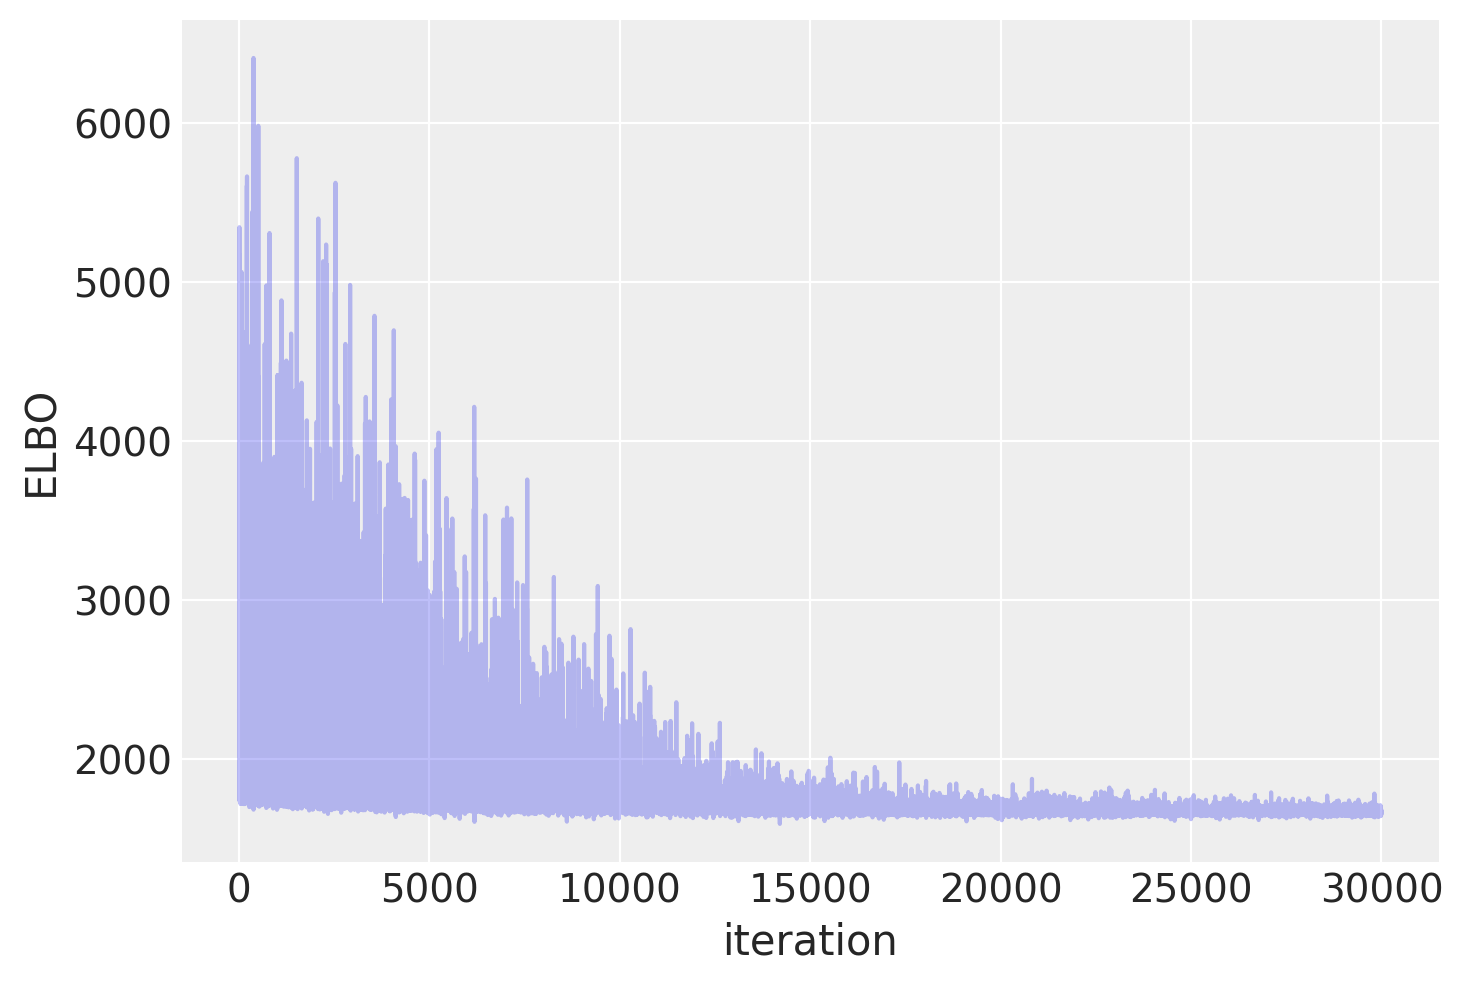

In [36]:
plt.plot(approx.hist, alpha=0.3)
plt.ylabel("ELBO")
plt.xlabel("iteration");

In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def kmeans_clustering(data: pd.DataFrame, k: int, max_iterations: int = 100) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Implementa el algoritmo de clustering K-means para DataFrames.
    
    :param data: DataFrame con las características
    :param k: Número de clusters
    :param max_iterations: Número máximo de iteraciones
    :return: Tupla con DataFrame de centroides y array de etiquetas de cluster para cada punto
    """
    # Convertir DataFrame a array numpy para cálculos más rápidos
    data_array = data.values
    
    # Inicializar centroides aleatoriamente
    centroid_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data_array[centroid_indices]
    
    for _ in range(max_iterations):
        # Asignar puntos a los centroides más cercanos
        distances = np.sqrt(((data_array[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Actualizar centroides
        new_centroids = np.array([data_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Verificar convergencia
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Convertir centroides de vuelta a DataFrame
    centroid_df = pd.DataFrame(centroids, columns=data.columns)
    
    return centroid_df, labels

def visualize_high_dim_clusters(data: pd.DataFrame, labels: np.ndarray, centroids: pd.DataFrame, 
                                landslide_labels: np.ndarray, method: str = 'pca'):
    """
    Visualiza los resultados del clustering K-means para datos de alta dimensionalidad,
    diferenciando entre muestras de deslizamiento y no deslizamiento.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param centroids: DataFrame de centroides
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param method: Método de reducción de dimensionalidad ('pca' o 'tsne')
    """
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("El método debe ser 'pca' o 'tsne'")

    # Reducir dimensionalidad de los datos y centroides
    data_2d = reducer.fit_transform(data)
    centroids_2d = reducer.transform(centroids)

    # Visualizar los resultados
    plt.figure(figsize=(12, 8))
    
    # Diferenciar entre deslizamiento y no deslizamiento
    scatter_landslide = plt.scatter(data_2d[landslide_labels == 1, 0], data_2d[landslide_labels == 1, 1],
                                    c=labels[landslide_labels == 1], cmap='viridis', marker='o', label='Deslizamiento')
    scatter_non_landslide = plt.scatter(data_2d[landslide_labels == 0, 0], data_2d[landslide_labels == 0, 1],
                                        c=labels[landslide_labels == 0], cmap='viridis', marker='s', label='No Deslizamiento')
    
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroides')
    
    plt.colorbar(scatter_landslide)
    plt.title(f'Resultados del Clustering K-means ({method.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

def visualize_feature_importance(data: pd.DataFrame, labels: np.ndarray, n_top_features: int = 10):
    """
    Visualiza la importancia de las características basada en la varianza entre clusters.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param n_top_features: Número de características principales a visualizar
    """
    k = len(np.unique(labels))
    feature_importance = np.zeros(data.shape[1])

    for i in range(k):
        cluster_data = data[labels == i]
        cluster_mean = cluster_data.mean()
        feature_importance += ((cluster_data - cluster_mean) ** 2).sum()

    # Normalizar la importancia de las características
    feature_importance /= feature_importance.sum()

    # Ordenar las características por importancia
    sorted_features = feature_importance.sort_values(ascending=False)
    top_features = sorted_features.head(n_top_features)

    # Visualizar la importancia de las características
    plt.figure(figsize=(12, 6))
    top_features.plot(kind='bar')
    plt.xlabel('Nombre de la característica')
    plt.ylabel('Importancia relativa')
    plt.title('Importancia de las características en el clustering')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
data = X
data_y = y

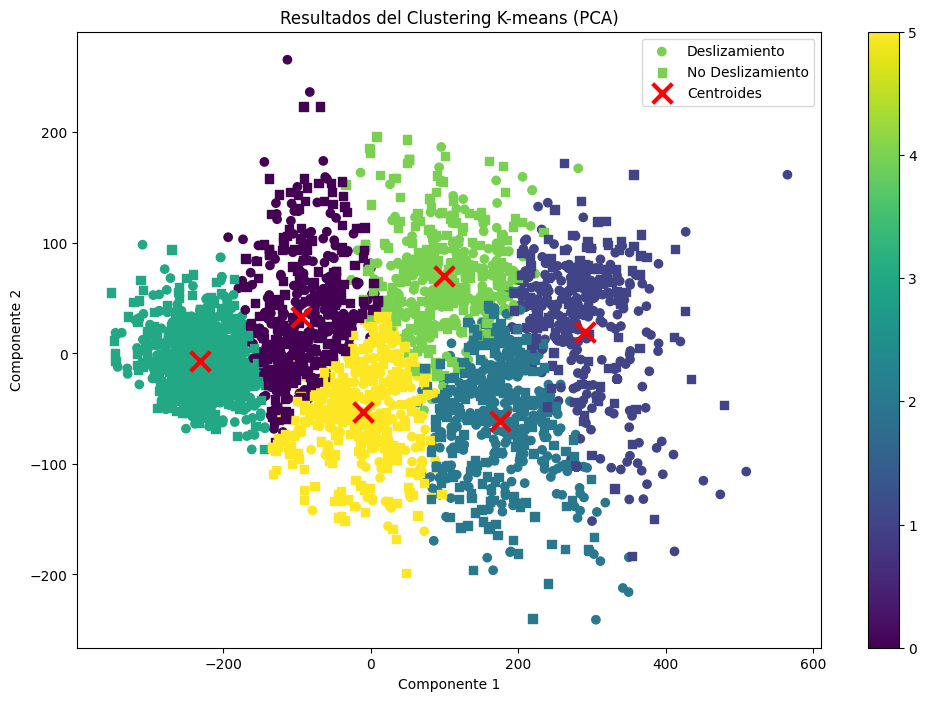

In [ ]:
centroids, label = kmeans_clustering(data, 6)
visualize_high_dim_clusters(data, label, centroids, method='pca', landslide_labels=data_y)

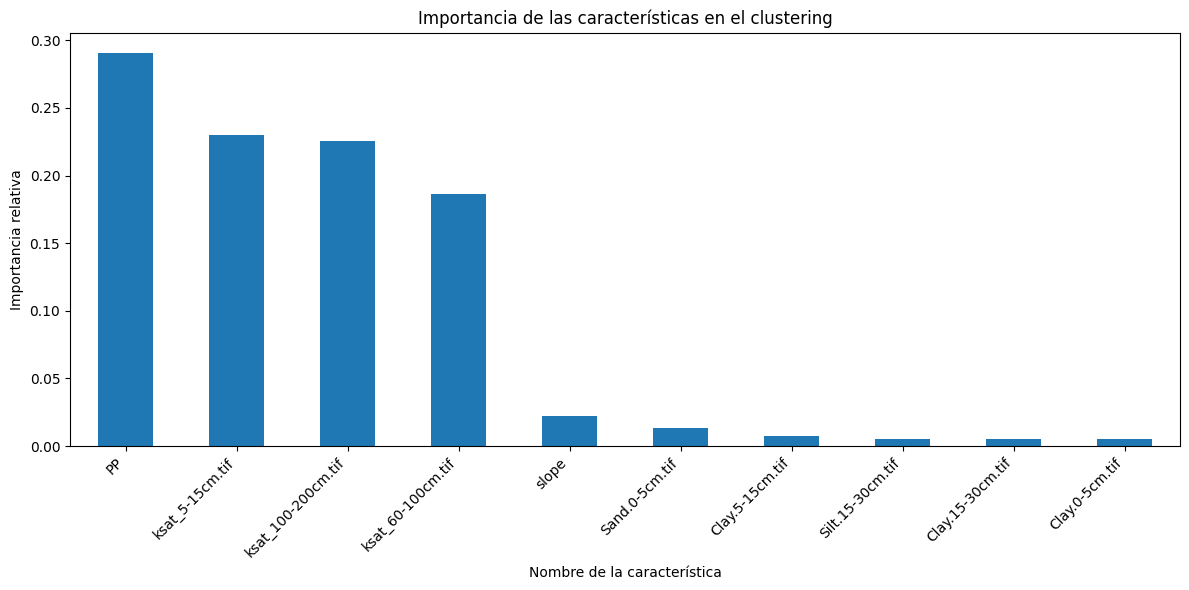

In [ ]:
visualize_feature_importance(data, label)

In [ ]:
def landslide_distribution_table(labels: np.ndarray, landslide_labels: np.ndarray) -> pd.DataFrame:
    """
    Crea una tabla que muestra la distribución de muestras de deslizamiento (1) y no deslizamiento (0) en cada cluster.
    
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :return: DataFrame con la distribución de deslizamientos por cluster
    """
    clusters = np.unique(labels)
    distribution = []

    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })

    df_distribution = pd.DataFrame(distribution)
    df_distribution.set_index('Cluster', inplace=True)
    
    # Añadir fila de totales
    totals = df_distribution.sum()
    totals['% No Deslizamiento'] = totals['No Deslizamiento (0)'] / totals['Total'] * 100
    totals['% Deslizamiento'] = totals['Deslizamiento (1)'] / totals['Total'] * 100
    df_distribution.loc['Total'] = totals

    return df_distribution

In [ ]:
landslide_distribution_table(label, data_y)

No Deslizamiento (0)  Deslizamiento (1)   Total  % No Deslizamiento  \
Cluster                                                                        
0                       249.0              252.0   501.0           49.700599   
1                       117.0              303.0   420.0           27.857143   
2                       213.0              267.0   480.0           44.375000   
3                       418.0              450.0   868.0           48.156682   
4                       258.0              205.0   463.0           55.723542   
5                       275.0              141.0   416.0           66.105769   
Total                  1530.0             1618.0  3148.0           48.602287   

         % Deslizamiento  
Cluster                   
0              50.299401  
1              72.142857  
2              55.625000  
3              51.843318  
4              44.276458  
5              33.894231  
Total          51.397713

In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple
from sklearn.utils import resample

def select_non_landslide_samples(data: pd.DataFrame, labels: np.ndarray, landslide_labels: np.ndarray, 
                                 diversity_factor: float = 0.2) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Selecciona muestras de no deslizamiento basadas en los resultados del clustering.
    
    :param data: DataFrame con todas las muestras y sus características
    :param labels: Array de etiquetas de cluster para cada muestra
    :param landslide_labels: Array de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param diversity_factor: Proporción de muestras a seleccionar de otros clusters (default 0.2)
    :return: Tuple con DataFrame de muestras no deslizamiento seleccionadas y sus etiquetas
    """
    # Crear tabla de distribución
    clusters = np.unique(labels)
    distribution = []
    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })
    df_distribution = pd.DataFrame(distribution)
    
    # Identificar el cluster con menor porcentaje de deslizamientos
    target_cluster = df_distribution.loc[df_distribution['% Deslizamiento'].idxmin(), 'Cluster']
    
    # Seleccionar muestras no deslizamiento del cluster objetivo
    target_mask = (labels == target_cluster) & (landslide_labels == 0)
    target_samples = data[target_mask]
    
    # Calcular el número de muestras adicionales a seleccionar de otros clusters
    n_additional = int(len(target_samples) * diversity_factor)
    
    # Seleccionar muestras adicionales de otros clusters
    other_clusters_mask = (labels != target_cluster) & (landslide_labels == 0)
    other_samples = data[other_clusters_mask]
    additional_samples = resample(other_samples, n_samples=n_additional, replace=False)
    
    # Combinar muestras
    selected_samples = pd.concat([target_samples, additional_samples])
    selected_labels = np.zeros(len(selected_samples))  # Todas son no deslizamiento (0)
    
    print(f"Seleccionadas {len(target_samples)} muestras del cluster {target_cluster}")
    print(f"Añadidas {n_additional} muestras de otros clusters para diversidad")
    print(f"Total de muestras no deslizamiento seleccionadas: {len(selected_samples)}")
    
    return selected_samples, selected_labels


In [ ]:
non_landslide_samples, non_landslide_labels = select_non_landslide_samples(data, label, data_y, diversity_factor=0.8)

Seleccionadas 275 muestras del cluster 5
Añadidas 220 muestras de otros clusters para diversidad
Total de muestras no deslizamiento seleccionadas: 495


In [ ]:
non_landslide_samples.columns

Index(['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif',
       'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif',
       'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif',
       'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif',
       'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif',
       'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif',
       'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif',
       'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif',
       'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif',
       'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif',
       'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif',
       'ksat.15-30cm.tif'],
      dtype='object')

In [ ]:
non_landslide_samples['Valor'] = 0

In [ ]:
non_landslide_labels = pd.DataFrame()
non_landslide_labels = non_landslide_samples['Valor']
non_landslide_samples = non_landslide_samples.drop(columns=['Valor'])

In [ ]:
data = pd.concat([data, non_landslide_samples])
data_y = pd.concat([data_y, non_landslide_labels])